In [3]:
!pip install wordcloud

     -------------------------------------- 153.1/153.1 kB 9.5 MB/s eta 0:00:00


In [1]:
import pandas as pd
import snscrape.modules.twitter as sntwitter
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer

import string
import re
import textblob
from textblob import TextBlob
import os

from wordcloud import WordCloud, STOPWORDS
from wordcloud import ImageColorGenerator
import warnings
%matplotlib inline

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Test\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
# os.system("snscrape --jsonl --max-results 5000 --since 2023-01-31 twitter-search 'Budget 2023 until:2023-02-07'>text-query-tweets.json")

In [3]:
tweets_df = pd.read_json("text-chatGPT4-tweets.json" ,lines=True)

In [4]:
tweets_df.head(5)

,_type,url,date,rawContent,renderedContent,id,user,replyCount,retweetCount,likeCount,...,cashtags,card,viewCount,vibe,content,outlinks,outlinksss,tcooutlinks,tcooutlinksss,username
0,snscrape.modules.twitter.Tweet,https://twitter.com/bar_zie/status/16432243005...,2023-04-04 12:09:37+00:00,What else would you add to the list?\n\n#AI #A...,What else would you add to the list?\n\n#AI #A...,1643224300516671490,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,0,...,None,None,NaN,None,What else would you add to the list?\n\n#AI #A...,[],,[],,bar_zie
1,snscrape.modules.twitter.Tweet,https://twitter.com/ZambranoJc/status/16432241...,2023-04-04 12:09:04+00:00,#ai #chatgpt4 https://t.co/yqaBHrrS7T,#ai #chatgpt4 lnkd.in/eAhpTRYm,1643224162289303555,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,0,...,None,{'_type': 'snscrape.modules.twitter.PlayerCard...,2.0,None,#ai #chatgpt4 https://t.co/yqaBHrrS7T,[https://lnkd.in/eAhpTRYm],https://lnkd.in/eAhpTRYm,[https://t.co/yqaBHrrS7T],https://t.co/yqaBHrrS7T,ZambranoJc
2,snscrape.modules.twitter.Tweet,https://twitter.com/rodyoversloot/status/16432...,2023-04-04 12:08:23+00:00,Is #chatgpt #chatgpt3 #chatgpt4 going backward...,Is #chatgpt #chatgpt3 #chatgpt4 going backward...,1643223992055021568,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,0,...,None,None,3.0,None,Is #chatgpt #chatgpt3 #chatgpt4 going backward...,[],,[],,rodyoversloot
3,snscrape.modules.twitter.Tweet,https://twitter.com/super_adviser/status/16432...,2023-04-04 12:07:11+00:00,ささる人にはささる話７８〜Chat GPT4の凄まじさ②〜\n⇒ https://t.co/...,ささる人にはささる話７８〜Chat GPT4の凄まじさ②〜\n⇒ ameblo.jp/sup...,1643223687230029825,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,0,...,None,{'_type': 'snscrape.modules.twitter.SummaryCar...,10.0,None,ささる人にはささる話７８〜Chat GPT4の凄まじさ②〜\n⇒ https://t.co/...,[https://ameblo.jp/superadviser01/entry-127969...,https://ameblo.jp/superadviser01/entry-1279690...,[https://t.co/VQDmWDKHdl],https://t.co/VQDmWDKHdl,super_adviser
4,snscrape.modules.twitter.Tweet,https://twitter.com/koko069/status/16432231414...,2023-04-04 12:05:01+00:00,ipad買ったのはkindleでChatGPT4関連の本読みたかったんよね\n\nたぶん、I...,ipad買ったのはkindleでChatGPT4関連の本読みたかったんよね\n\nたぶん、I...,1643223141475586048,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,0,...,None,None,3.0,None,ipad買ったのはkindleでChatGPT4関連の本読みたかったんよね\n\nたぶん、I...,[],,[],,koko069


In [5]:
df1 = tweets_df[[ 'date', 'rawContent' , 'renderedContent' , 'user' , 'replyCount' ,'retweetCount' , 'likeCount' , 'lang' , 'place' , 'hashtags' , 'viewCount']].copy()

In [6]:
df1.head()

,date,rawContent,renderedContent,user,replyCount,retweetCount,likeCount,lang,place,hashtags,viewCount
0,2023-04-04 12:09:37+00:00,What else would you add to the list?\n\n#AI #A...,What else would you add to the list?\n\n#AI #A...,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,0,en,None,"[AI, AIineducation, BAZrecommends, ChatGPT, ch...",NaN
1,2023-04-04 12:09:04+00:00,#ai #chatgpt4 https://t.co/yqaBHrrS7T,#ai #chatgpt4 lnkd.in/eAhpTRYm,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,0,qme,None,"[ai, chatgpt4]",2.0
2,2023-04-04 12:08:23+00:00,Is #chatgpt #chatgpt3 #chatgpt4 going backward...,Is #chatgpt #chatgpt3 #chatgpt4 going backward...,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,0,en,None,"[chatgpt, chatgpt3, chatgpt4]",3.0
3,2023-04-04 12:07:11+00:00,ささる人にはささる話７８〜Chat GPT4の凄まじさ②〜\n⇒ https://t.co/...,ささる人にはささる話７８〜Chat GPT4の凄まじさ②〜\n⇒ ameblo.jp/sup...,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,0,ja,None,[アメブロ],10.0
4,2023-04-04 12:05:01+00:00,ipad買ったのはkindleでChatGPT4関連の本読みたかったんよね\n\nたぶん、I...,ipad買ったのはkindleでChatGPT4関連の本読みたかったんよね\n\nたぶん、I...,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,0,ja,None,None,3.0


In [7]:
df1.shape

(20000, 11)

In [8]:
df1=df1.drop_duplicates("renderedContent")

In [9]:
df1.shape

(17886, 11)

In [10]:
df1.head

<bound method NDFrame.head of                            date  \
0     2023-04-04 12:09:37+00:00   
1     2023-04-04 12:09:04+00:00   
2     2023-04-04 12:08:23+00:00   
3     2023-04-04 12:07:11+00:00   
4     2023-04-04 12:05:01+00:00   
...                         ...   
19995 2023-03-20 12:09:04+00:00   
19996 2023-03-20 12:08:52+00:00   
19997 2023-03-20 12:08:39+00:00   
19998 2023-03-20 12:07:25+00:00   
19999 2023-03-20 12:07:05+00:00   

                                              rawContent  \
0      What else would you add to the list?\n\n#AI #A...   
1                  #ai #chatgpt4 https://t.co/yqaBHrrS7T   
2      Is #chatgpt #chatgpt3 #chatgpt4 going backward...   
3      ささる人にはささる話７８〜Chat GPT4の凄まじさ②〜\n⇒ https://t.co/...   
4      ipad買ったのはkindleでChatGPT4関連の本読みたかったんよね\n\nたぶん、I...   
...                                                  ...   
19995  The topic of #openai &amp; cybersecurity has b...   
19996            This tweet was written with #chatgpt4 👇   
19997  03

In [11]:
df1.info

<bound method DataFrame.info of                            date  \
0     2023-04-04 12:09:37+00:00   
1     2023-04-04 12:09:04+00:00   
2     2023-04-04 12:08:23+00:00   
3     2023-04-04 12:07:11+00:00   
4     2023-04-04 12:05:01+00:00   
...                         ...   
19995 2023-03-20 12:09:04+00:00   
19996 2023-03-20 12:08:52+00:00   
19997 2023-03-20 12:08:39+00:00   
19998 2023-03-20 12:07:25+00:00   
19999 2023-03-20 12:07:05+00:00   

                                              rawContent  \
0      What else would you add to the list?\n\n#AI #A...   
1                  #ai #chatgpt4 https://t.co/yqaBHrrS7T   
2      Is #chatgpt #chatgpt3 #chatgpt4 going backward...   
3      ささる人にはささる話７８〜Chat GPT4の凄まじさ②〜\n⇒ https://t.co/...   
4      ipad買ったのはkindleでChatGPT4関連の本読みたかったんよね\n\nたぶん、I...   
...                                                  ...   
19995  The topic of #openai &amp; cybersecurity has b...   
19996            This tweet was written with #chatgpt4 👇   
19997  

In [12]:
df1.date.value_counts()

2023-03-22 14:04:23+00:00    3
2023-03-27 08:03:42+00:00    3
2023-03-23 05:15:00+00:00    3
2023-04-02 17:11:43+00:00    3
2023-04-02 17:11:45+00:00    3
                            ..
2023-03-29 13:56:11+00:00    1
2023-03-29 13:54:36+00:00    1
2023-03-29 13:54:06+00:00    1
2023-03-29 13:51:35+00:00    1
2023-03-20 12:07:05+00:00    1
Name: date, Length: 17655, dtype: int64

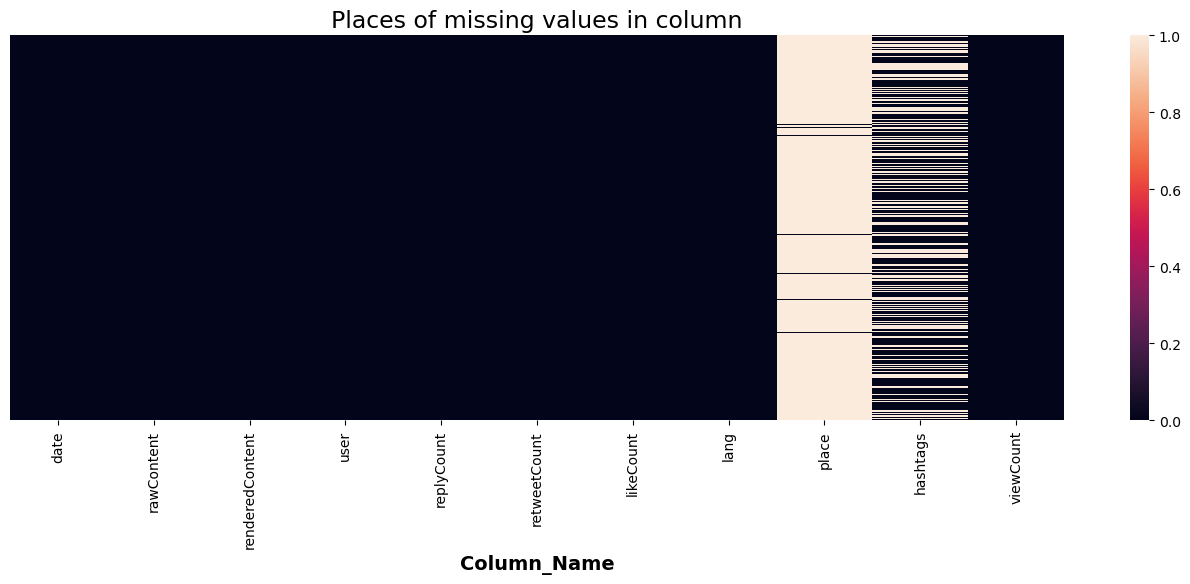

In [13]:
plt.figure(figsize=(17, 5))
sns.heatmap(df1.isnull(), cbar=True, yticklabels=False)
plt.xlabel("Column_Name", size=14, weight="bold")
plt.title("Places of missing values in column",size=17)
plt.show()

In [14]:
import plotly.graph_objects as go
Top_Location_Of_tweet= df1['place'].value_counts().head (10)

In [15]:
print(Top_Location_Of_tweet)

{'_type': 'snscrape.modules.twitter.Place', 'id': '123ad1f35e190c93', 'fullName': 'Anekal Bangaluru, India', 'name': 'Anekal Bangaluru', 'type': 'city', 'country': 'India', 'countryCode': 'IN'}                                          6
{'_type': 'snscrape.modules.twitter.Place', 'id': '3b77caf94bfc81fe', 'fullName': 'Los Angeles, CA', 'name': 'Los Angeles', 'type': 'city', 'country': 'United States', 'countryCode': 'US'}                                               5
{'_type': 'snscrape.modules.twitter.Place', 'id': '1a27537478dd8e38', 'fullName': 'Barcelona, Spain', 'name': 'Barcelona', 'type': 'city', 'country': 'Spain', 'countryCode': 'ES'}                                                        5
{'_type': 'snscrape.modules.twitter.Place', 'id': '018f1cde6bad9747', 'fullName': 'Ciudad Autónoma de Buenos Aires, Argentina', 'name': 'Ciudad Autónoma de Buenos Aires', 'type': 'city', 'country': 'Argentina', 'countryCode': 'AR'}    5
{'_type': 'snscrape.modules.twitter.Place', 'id': '3

In [16]:
from nltk. corpus import stopwords
stop = stopwords.words('english')
df1['renderedContent'].apply(lambda x: [item for item in x if item not in stop])
df1.shape

(17886, 11)

In [17]:
!pip install tweet-preprocessor

In [18]:
#Remove unnecessary characters
punct  =  ['%','/',':','\\','&amp','&',';','?']

def remove_punctuations(text):
  for punctuation in punct:
    text = text.replace(punctuation,'')
  return text

In [19]:
df1['renderedContent'] = df1['renderedContent'].apply(lambda x: remove_punctuations(x))

In [20]:
df1['renderedContent'].replace( '', np.nan, inplace=True)
df1.dropna(subset=["renderedContent"],inplace=True)
len(df1)

17886

In [21]:
df1 = df1.reset_index(drop=True)
df1.head()

,date,rawContent,renderedContent,user,replyCount,retweetCount,likeCount,lang,place,hashtags,viewCount
0,2023-04-04 12:09:37+00:00,What else would you add to the list?\n\n#AI #A...,What else would you add to the list\n\n#AI #AI...,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,0,en,None,"[AI, AIineducation, BAZrecommends, ChatGPT, ch...",NaN
1,2023-04-04 12:09:04+00:00,#ai #chatgpt4 https://t.co/yqaBHrrS7T,#ai #chatgpt4 lnkd.ineAhpTRYm,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,0,qme,None,"[ai, chatgpt4]",2.0
2,2023-04-04 12:08:23+00:00,Is #chatgpt #chatgpt3 #chatgpt4 going backward...,Is #chatgpt #chatgpt3 #chatgpt4 going backward...,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,0,en,None,"[chatgpt, chatgpt3, chatgpt4]",3.0
3,2023-04-04 12:07:11+00:00,ささる人にはささる話７８〜Chat GPT4の凄まじさ②〜\n⇒ https://t.co/...,ささる人にはささる話７８〜Chat GPT4の凄まじさ②〜\n⇒ ameblo.jpsupe...,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,0,ja,None,[アメブロ],10.0
4,2023-04-04 12:05:01+00:00,ipad買ったのはkindleでChatGPT4関連の本読みたかったんよね\n\nたぶん、I...,ipad買ったのはkindleでChatGPT4関連の本読みたかったんよね\n\nたぶん、I...,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,0,ja,None,None,3.0


In [22]:
from sklearn.feature_extraction. text import TfidfVectorizer, CountVectorizer

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]


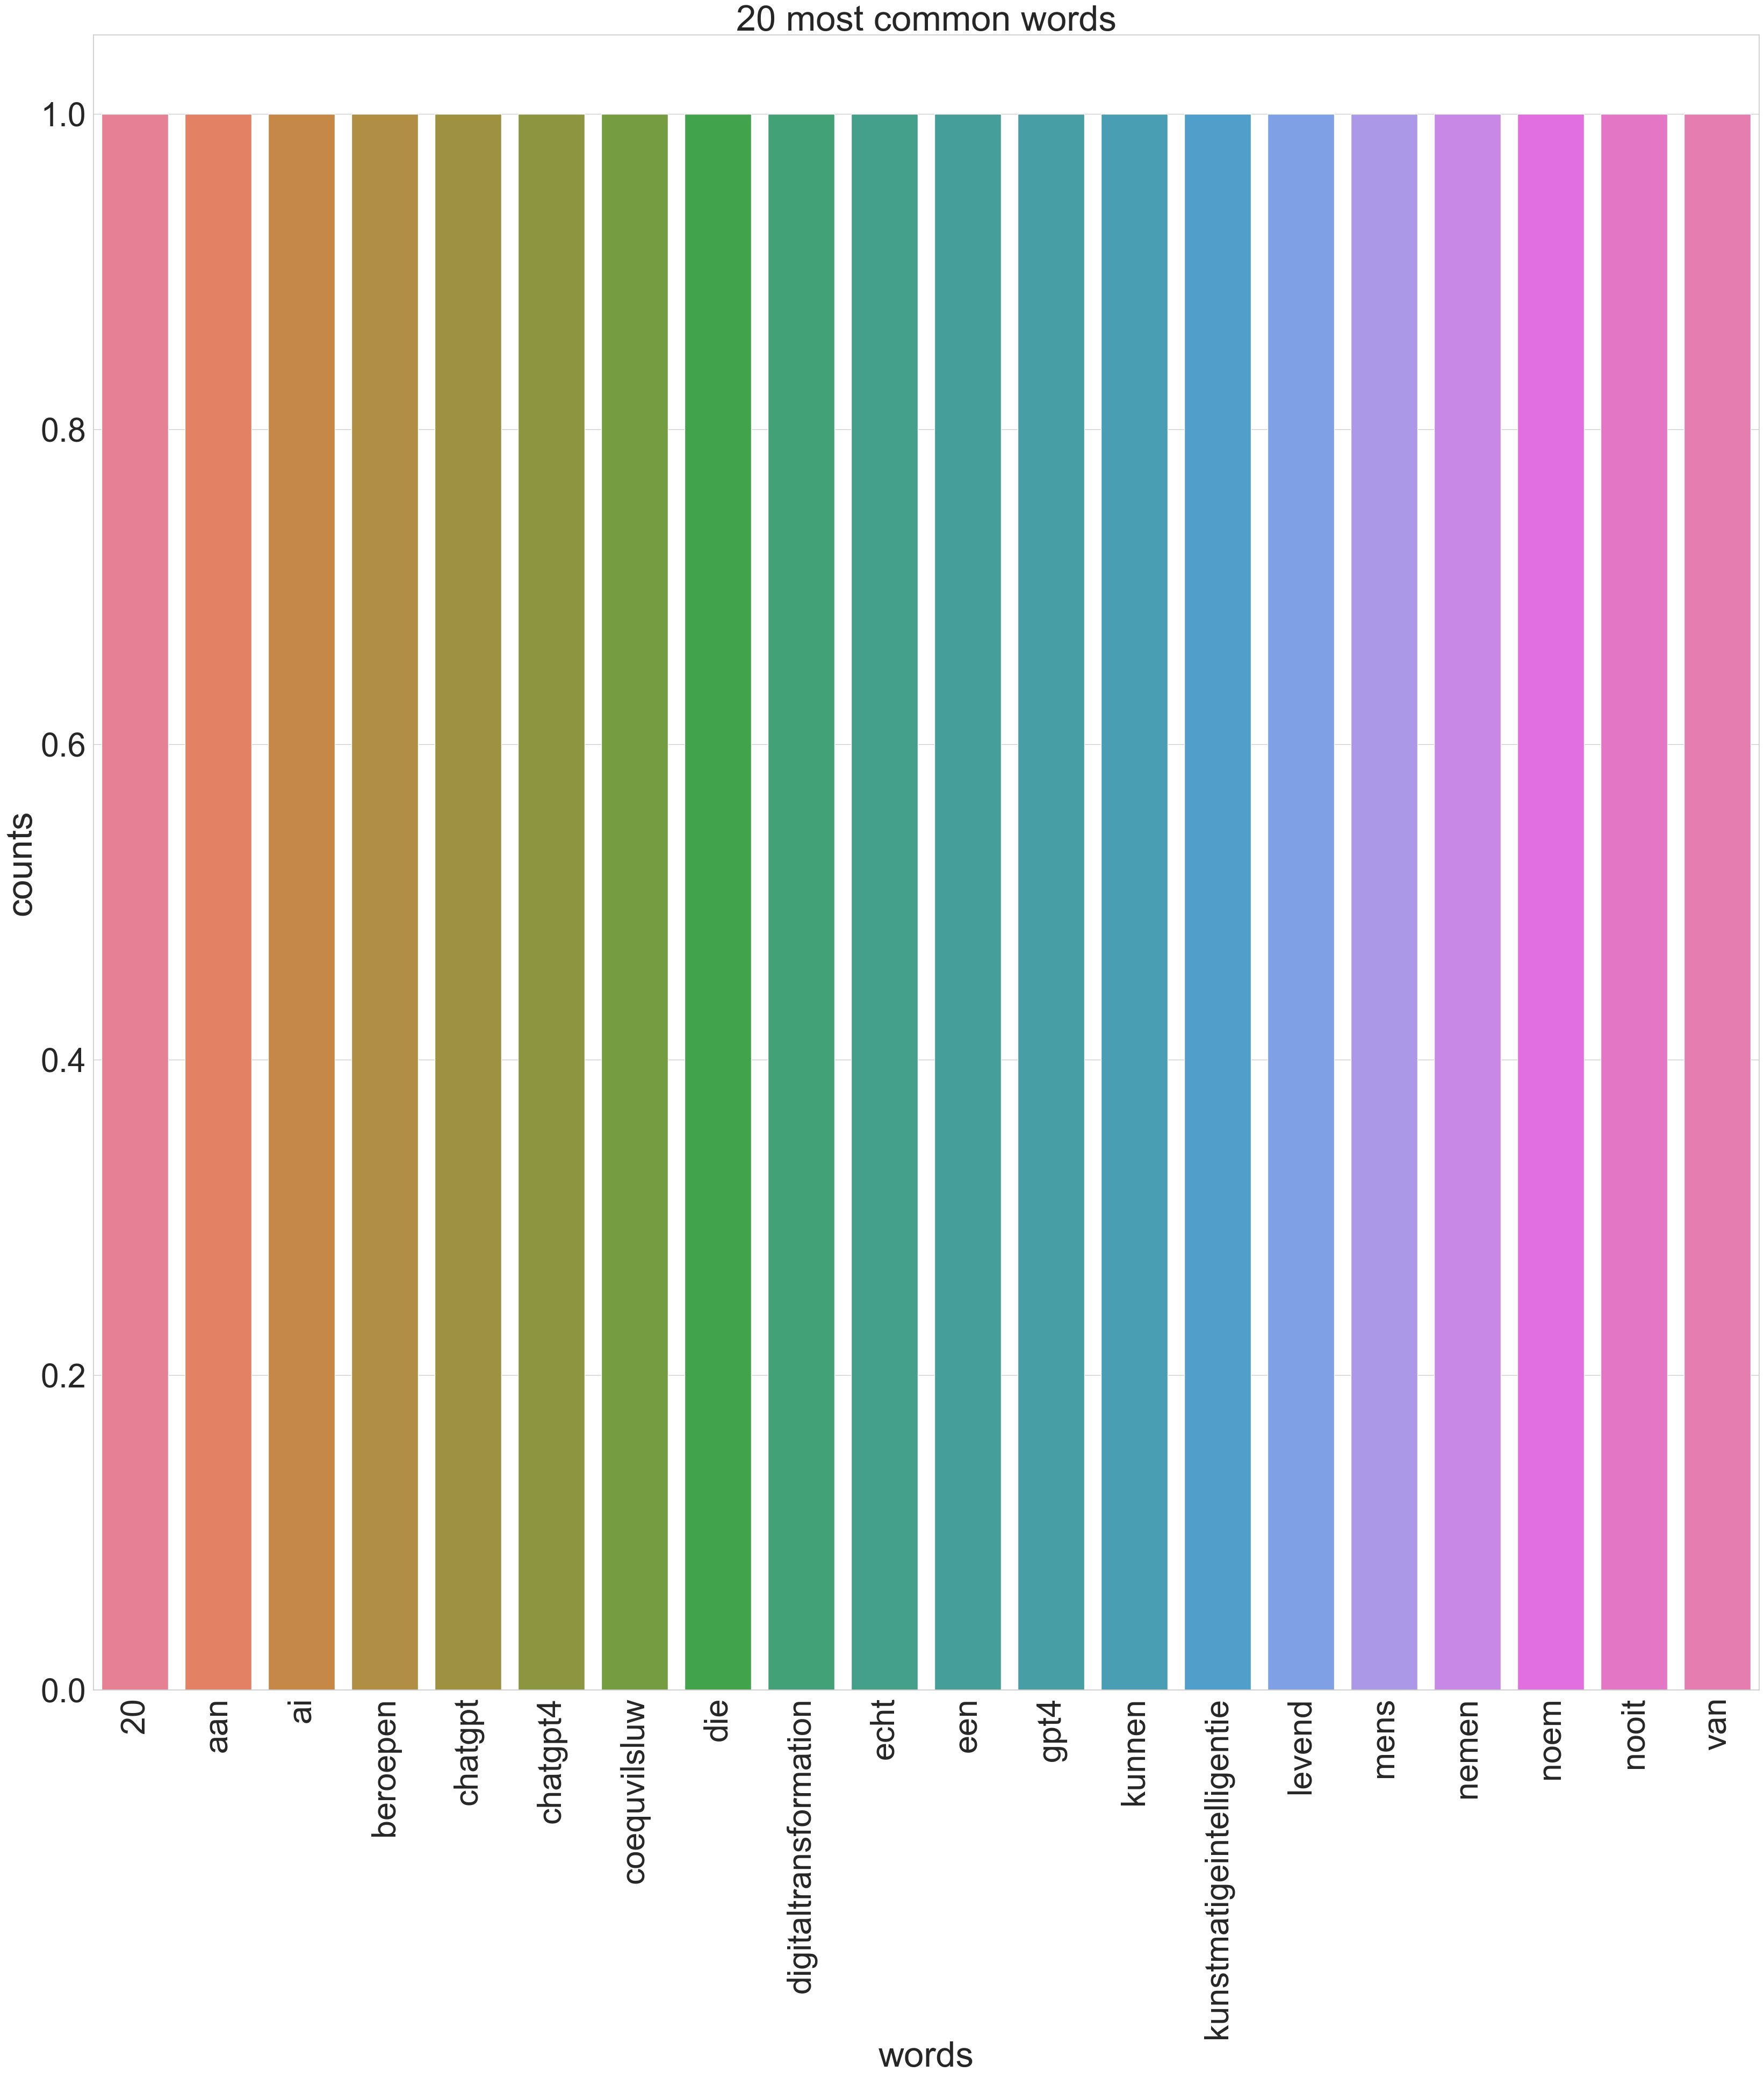

In [44]:
sns.set_style('whitegrid')
%matplotlib inline
stop=stop+['budget2023' , 'budget' , 'httpst' , '2023', 'modi' ,'nsitaraman' , 'union', 'pmindia' , 'tax' , 'india']
def plot_20_most_common_words(count_data, count_vectorizer) :
    import matplotlib. pyplot as plt
    words = count_vectorizer.get_feature_names_out()
    total_counts = np. zeros(len(words))
    for t in count_data:
        total_counts = t.toarray()[0]
    count_dict = (zip(words, total_counts))
    count_dict = sorted(count_dict, key=lambda x:x[1],reverse=True)[0:20]
    words = [w[0] for w in count_dict]
    counts = [w[1] for w in count_dict]
    x_pos = np.arange(len(words))
    print(x_pos)
    plt.figure(2, (40,40))
    plt.subplot(title = '20 most common words')
    sns. set_context('notebook',font_scale=4,rc={ 'lines.linewidth' :2.5})
    sns.barplot(x=x_pos, y=counts, palette='husl')
    plt.xticks(x_pos, words, rotation=90)
    plt.xlabel('words')
    plt.ylabel('counts')
    plt.show()

count_vectorizer = CountVectorizer(stop_words=stop)
# Fit and transform the processed titles
count_data = count_vectorizer.fit_transform(df1['renderedContent'])
# print(count_vectorizer)
# print(count_data)
# Visualise the 20 most common words
plot_20_most_common_words(count_data,count_vectorizer)
# plt.savefig( 'saved_figure.png')

NameError: name 'x_pos' is not defined

In [45]:
!pip install cufflinks

     ---------------------------------------- 81.7/81.7 kB 4.8 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for cufflinks: filename=cufflinks-0.17.3-py3-none-any.whl size=68725 sha256=cd6ce658bfd6ca386e89a488ad2d0bca220fc1d62731232fe1d211b38c38fb47
  Stored in directory: c:\users\test\appdata\local\pip\cache\wheels\b1\8f\ec\b76ac80a14f3f5f59643cbc2eee7d78690b1bd158279f299dd
Successfully built cufflinks


<Axes: title={'center': 'Top 8 bigrams'}, ylabel='ngram'>

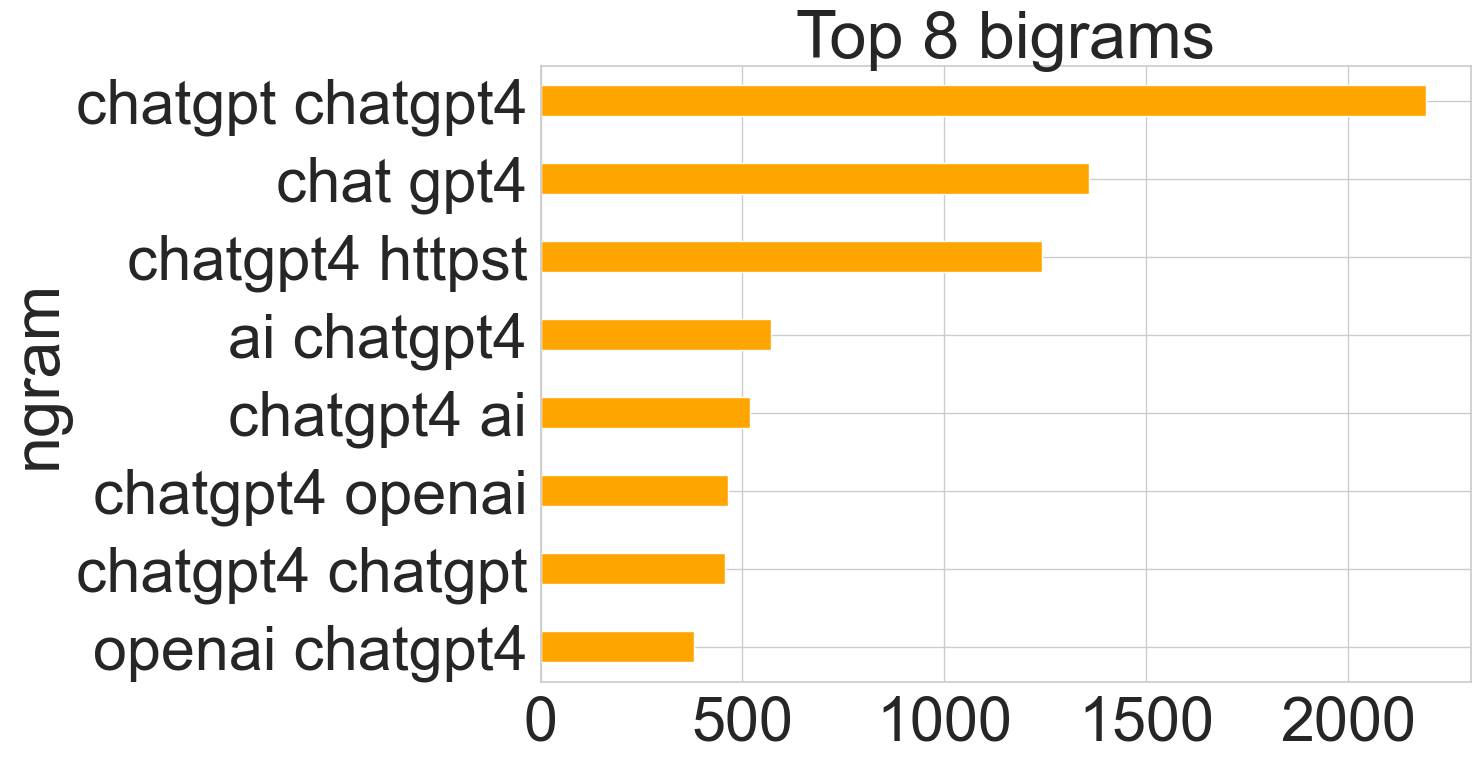

In [46]:
import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

def get_top_n_bigram(corpus, n=None) :
  vec = CountVectorizer(ngram_range=(2, 4), stop_words="english").fit(corpus)
  bag_of_words = vec.transform(corpus)
  sum_words = bag_of_words.sum(axis=0)
  words_freq =[(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
  words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
  return words_freq[:n]

common_words = get_top_n_bigram(df1['renderedContent'] , 8)
mydict={}
for word, freq in common_words:
  bigram_df = pd.DataFrame(common_words,columns = ['ngram', 'count'])

bigram_df.groupby( 'ngram' ).sum()['count'].sort_values(ascending=False).sort_values().plot.barh(title = 'Top 8 bigrams',color='orange' , width=.4, figsize=(12,8),stacked = True)

In [47]:
def get_subjectivity(text):
  return TextBlob(text).sentiment.subjectivity
def get_polarity(text):
  return TextBlob(text).sentiment.polarity

In [48]:
df1['subjectivity']=df1[ 'renderedContent'].apply(get_subjectivity)
df1[ 'polarity' ]=df1[ 'renderedContent'].apply(get_polarity)
df1.head()

,date,rawContent,renderedContent,user,replyCount,retweetCount,likeCount,lang,place,hashtags,viewCount,subjectivity,polarity
0,2023-04-04 12:09:37+00:00,What else would you add to the list?\n\n#AI #A...,What else would you add to the list\n\n#AI #AI...,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,0,en,None,"[AI, AIineducation, BAZrecommends, ChatGPT, ch...",NaN,0.00,0.00
1,2023-04-04 12:09:04+00:00,#ai #chatgpt4 https://t.co/yqaBHrrS7T,#ai #chatgpt4 lnkd.ineAhpTRYm,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,0,qme,None,"[ai, chatgpt4]",2.0,0.00,0.00
2,2023-04-04 12:08:23+00:00,Is #chatgpt #chatgpt3 #chatgpt4 going backward...,Is #chatgpt #chatgpt3 #chatgpt4 going backward...,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,0,en,None,"[chatgpt, chatgpt3, chatgpt4]",3.0,0.75,0.25
3,2023-04-04 12:07:11+00:00,ささる人にはささる話７８〜Chat GPT4の凄まじさ②〜\n⇒ https://t.co/...,ささる人にはささる話７８〜Chat GPT4の凄まじさ②〜\n⇒ ameblo.jpsupe...,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,0,ja,None,[アメブロ],10.0,0.00,0.00
4,2023-04-04 12:05:01+00:00,ipad買ったのはkindleでChatGPT4関連の本読みたかったんよね\n\nたぶん、I...,ipad買ったのはkindleでChatGPT4関連の本読みたかったんよね\n\nたぶん、I...,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,0,ja,None,None,3.0,0.00,0.00


In [49]:
df1['textblob_score'] =df1[ 'renderedContent'].apply(lambda x: TextBlob(x).sentiment.polarity)

In [50]:
neutral_threshold=0.05

In [51]:

df1['textblob_sentiment']=df1[ 'textblob_score'].apply(lambda c:'positive' if c >= neutral_threshold else ('Negative' if c <= -(neutral_threshold) else 'Neutral' ) )

In [52]:
textblob_df =  df1[['renderedContent','textblob_sentiment','likeCount']]
textblob_df

,renderedContent,textblob_sentiment,likeCount
0,What else would you add to the list\n\n#AI #AI...,Neutral,0
1,#ai #chatgpt4 lnkd.ineAhpTRYm,Neutral,0
2,Is #chatgpt #chatgpt3 #chatgpt4 going backward...,positive,0
3,ささる人にはささる話７８〜Chat GPT4の凄まじさ②〜\n⇒ ameblo.jpsupe...,Neutral,0
4,ipad買ったのはkindleでChatGPT4関連の本読みたかったんよね\n\nたぶん、I...,Neutral,0
...,...,...,...
17881,The topic of #openai cybersecurity has been h...,positive,1
17882,This tweet was written with #chatgpt4 👇,Neutral,0
17883,03152023 辉瑞公司在他们自己的文件中提到了一项名为生物分布的研究，他们在临床试验中就...,Neutral,0
17884,Gm fam! Using my #chatGPT4 model ATHENA to hel...,positive,11


In [53]:
textblob_df["textblob_sentiment"].value_counts()

Neutral     11093
positive     5332
Negative     1461
Name: textblob_sentiment, dtype: int64

<Axes: title={'center': 'Sentiment Analysis'}>

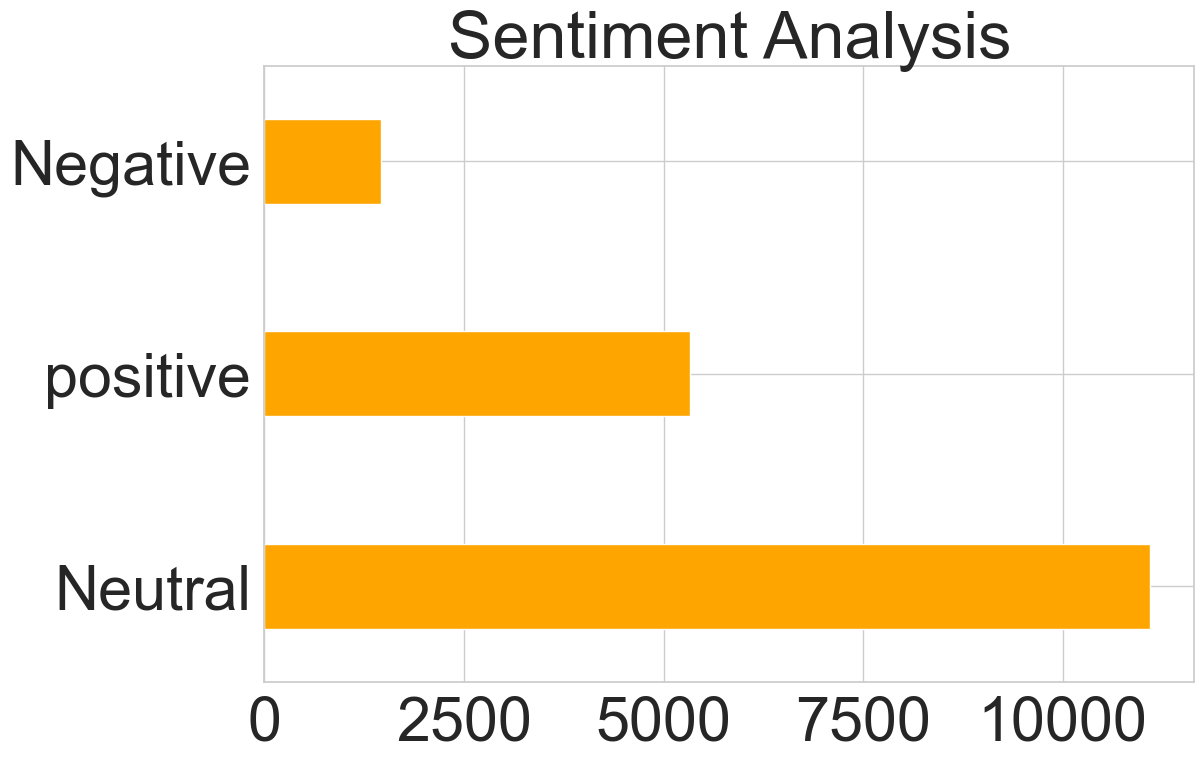

In [54]:
textblob_df["textblob_sentiment"].value_counts().plot.barh(title = 'Sentiment Analysis',color='orange' , width=.4, figsize=(12,8),stacked = True)

In [55]:
df_positive=textblob_df[textblob_df['textblob_sentiment']=='positive' ]

In [56]:
df_very_positive=df_positive[df_positive['likeCount']>0]

In [57]:
df_very_positive.head()

,renderedContent,textblob_sentiment,likeCount
18,Looking for a reliable and effective language ...,positive,1
37,"#ChatGPT may be a promising tool, but still ne...",positive,1
51,Top 10 ChatGPT Bots you must try \n\ntheinfoga...,positive,1
64,The real threat from AI… 10X the lawyers #chat...,positive,4
71,@MostBay Good names .. #GPT #ChatGPT #GPT4 #ch...,positive,1


In [58]:
df_negative=textblob_df[textblob_df['textblob_sentiment']=='Negative' ]

In [59]:
df_negative

,renderedContent,textblob_sentiment,likeCount
6,"My team tested the code quality , generated by...",Negative,0
35,@ZubyMusic @AnasBaddyr If ppl watch tecnology ...,Negative,1
109,What Is Generative AI\nHere’s everything you n...,Negative,0
126,"ChatGPT-4, ¿falsificación o alto secreto\n\n#C...",Negative,2
133,@SolamiMamis Here is an analysis of the statem...,Negative,3
...,...,...,...
17756,@emartineztv No es un powerpoint es inteligenc...,Negative,0
17825,Nog even en we mogen #chatgpt4 maar één vraag ...,Negative,0
17828,"Lets see how it works ,expect few out puts on ...",Negative,8
17847,We are living in a 𝐫𝐞𝐯𝐨𝐥𝐮𝐭𝐢𝐨𝐧𝐚𝐫𝐲 𝐞𝐫𝐚 and the l...,Negative,2


In [60]:
df_neutral=textblob_df[textblob_df['textblob_sentiment']=='Neutral' ]

In [61]:
df_neutral

,renderedContent,textblob_sentiment,likeCount
0,What else would you add to the list\n\n#AI #AI...,Neutral,0
1,#ai #chatgpt4 lnkd.ineAhpTRYm,Neutral,0
3,ささる人にはささる話７８〜Chat GPT4の凄まじさ②〜\n⇒ ameblo.jpsupe...,Neutral,0
4,ipad買ったのはkindleでChatGPT4関連の本読みたかったんよね\n\nたぶん、I...,Neutral,0
5,需要业务看我主页\nGPT-4已经发布，仅限Plus 会员使用！\n接Chatgpt Plu...,Neutral,0
...,...,...,...
17879,セガのドリームキャストにNetBSDをインストールする方法をChatGPT4に聞いてみた。そ...,Neutral,2
17880,This tweet was written with #chatgpt4 👆,Neutral,0
17882,This tweet was written with #chatgpt4 👇,Neutral,0
17883,03152023 辉瑞公司在他们自己的文件中提到了一项名为生物分布的研究，他们在临床试验中就...,Neutral,0


In [62]:
from wordcloud import WordCloud, STOPWORDS
from PIL import Image

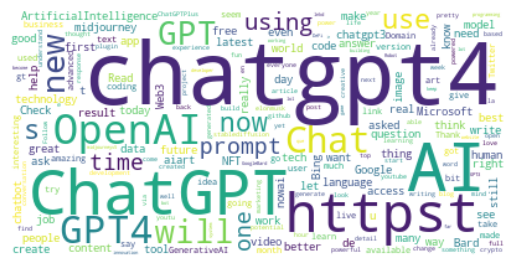

In [63]:
#Creating the text variable
positive_tw =" ".join(t for t in df_very_positive.renderedContent)
# Creating word _ cloud with text as argument in . generate() rtpthod
word_cloud1 = WordCloud(collocations = False, background_color = 'white') .generate(positive_tw)
# Display the generated Word Cloud
plt. imshow(word_cloud1, interpolation='bilinear')
plt.axis('off')
plt.show()

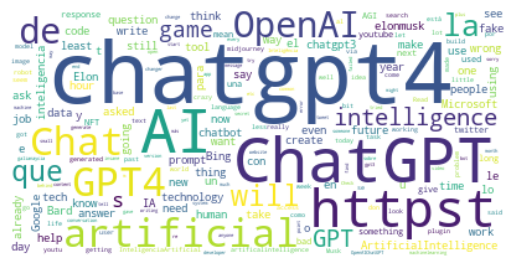

In [64]:
#Creating the text variable
negative_tw =" ".join(t for t in df_negative.renderedContent)
# Creating word _ cloud with text as argument in . generate() rtpthod
word_cloud2 = WordCloud(collocations = False, background_color = 'white') .generate(negative_tw)
# Display the generated Word Cloud
plt. imshow(word_cloud2, interpolation='bilinear')
plt.axis('off')
plt.show()

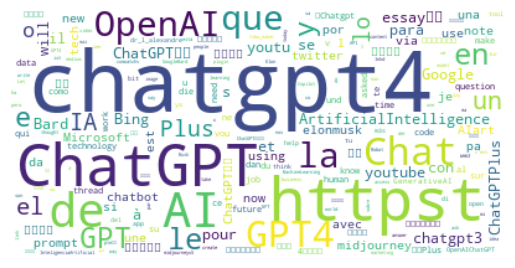

In [65]:
#Creating the text variable
neutral_tw =" ".join(t for t in df_neutral.renderedContent)
# Creating word _ cloud with text as argument in . generate() rtpthod
word_cloud2 = WordCloud(collocations = False, background_color = 'white') .generate(neutral_tw)
# Display the generated Word Cloud
plt. imshow(word_cloud2, interpolation='bilinear')
plt.axis('off')
plt.show()